using Sweden data!
Experiment: dqn_experiment 	 Episode: 1/1 	 Episode completion: 100.00 % 	 Delta: 0.77

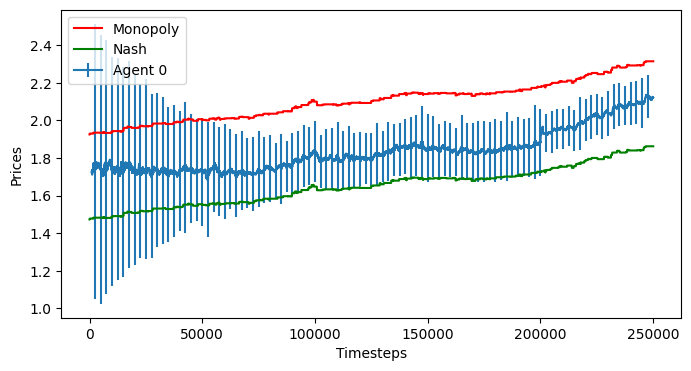

In [31]:
from agents.dqn import DQNAgent
from agents.sac import SACAgent
from envs.LinearBertrandInflation import LinearBertrandEnv
from envs.BertrandInflation import BertrandEnv
from replay_buffer import ReplayBuffer
import numpy as np
from tqdm import tqdm
import sys

N = 2
k = 1
rho = 1e-3
timesteps = 250_000
buffer_size = 200_000
sample_size = 256
update_steps = 1
deviate_start = 0.8
deviate_end = 0.9
random_state = 3381

np.random.seed(random_state)

variation = 'base'

dim_states = (N * k) + k + 1
dim_actions = 15
#dim_actions = 1

#env = LinearBertrandEnv(N, k, rho, timesteps, dim_actions=dim_actions)
env = BertrandEnv(N, k, rho, timesteps, dim_actions=dim_actions, max_var=2.0, mu = 0.25,
                  random_state = random_state, use_inflation_data=True, normalize=True)
buffer = ReplayBuffer(dim_states, N, buffer_size, sample_size)

agents = [DQNAgent(dim_states, dim_actions, beta = 5e-5, lr = 1e-1, random_state = random_state + _) for _ in range(N)]
#agents = [SACAgent(dim_states, dim_actions) for _ in range(N)]

exp_name = 'dqn_experiment'
episodes = 1

prices_history = np.zeros((episodes, timesteps, N))
actions_history = np.zeros((episodes, timesteps, N))
costs_history = np.zeros((episodes, timesteps))
monopoly_history = np.zeros((episodes, timesteps))
nash_history = np.zeros((episodes, timesteps))
rewards_history = np.zeros((episodes, timesteps, N))
delta_history = np.zeros((episodes, timesteps))
quantities_history = np.zeros((episodes, timesteps, N))
pi_N_history = np.zeros((episodes, timesteps))
pi_M_history = np.zeros((episodes, timesteps))
A_history = np.zeros((episodes, timesteps))

ob_t = env.reset()
for episode in range(episodes):
    for t in range(timesteps):
        
        actions = [agent.select_action(ob_t) for agent in agents]
        
        if variation == 'deviate':
            if (t/timesteps > deviate_start) and (t/timesteps <= deviate_end):
                env.trigger_deviation = True
            
            elif t/timesteps > deviate_end:
                env.trigger_deviation = False
        
        elif variation == 'altruist':
            env.altruist = True
        
        ob_t1, rewards, done, info = env.step(actions)
        
        experience = (ob_t, actions, rewards, ob_t1, done)
        
        buffer.store_transition(*experience)
        
        if (t % update_steps == 0) & (t >= buffer.sample_size):
            for agent_idx in range(N):
                agent = agents[agent_idx]
                sample = buffer.sample(agent_idx)
                agent.update(*sample)
                
        sys.stdout.write(f"\rExperiment: {exp_name} \t Episode: {episode + 1}/{episodes} \t Episode completion: {100 * t/timesteps:.2f} % \t Delta: {info:.2f}")
                
        ob_t = ob_t1
        
    # store episode metrics
    prices_history[episode] = np.array(env.prices_history)[-timesteps:]
    actions_history[episode] = np.array(env.action_history)[-timesteps:]
    costs_history[episode] = np.array(env.costs_history)[-timesteps:]
    monopoly_history[episode] = np.array(env.monopoly_history)[-timesteps:]
    nash_history[episode] = np.array(env.nash_history)[-timesteps:]
    rewards_history[episode] = np.array(env.rewards_history)[-timesteps:]
    delta_history[episode] = np.array(env.metric_history)[-timesteps:]
    quantities_history[episode] = np.array(env.quantities_history)[-timesteps:]
    pi_N_history[episode] = np.array(env.pi_N_history)[-timesteps:]
    pi_M_history[episode] = np.array(env.pi_M_history)[-timesteps:]
    A_history[episode] = np.array(env.A_history)[-timesteps:]

prices_history = np.mean(prices_history, axis = 0)
actions_history = np.mean(actions_history, axis = 0)
costs_history = np.mean(costs_history, axis = 0)
monopoly_history = np.mean(monopoly_history, axis = 0)
nash_history = np.mean(nash_history, axis = 0)
rewards_history = np.mean(rewards_history, axis = 0)
delta_history = np.mean(delta_history, axis = 0)
quantities_history = np.mean(quantities_history, axis = 0)
pi_N_history = np.mean(pi_N_history, axis = 0)
pi_M_history = np.mean(pi_M_history, axis = 0)
A_history = np.mean(A_history, axis = 0) # equal disposition to pay

import pickle

with open(f'models/agent_{random_state}.pkl', 'wb') as file:
    pickle.dump(agents[0], file)
    
import matplotlib.pyplot as plt
from utils.get_plots import get_rolling, get_rolling_std

window_size = 1000

prices_serie = get_rolling(prices_history[:, 0], window_size)
prices_serie_std = get_rolling_std(prices_history[:, 0], window_size)

series_size = len(prices_serie)

plt.figure(figsize = (8, 4))
plt.errorbar(range(series_size), prices_serie, prices_serie_std, errorevery=int(0.01 * series_size), label = f'Agent 0')
plt.plot(monopoly_history, color = 'red', label = 'Monopoly')
plt.plot(nash_history, color = 'green', label = 'Nash')
plt.xlabel('Timesteps')
plt.ylabel('Prices')
plt.legend()
plt.savefig(f'figures/simple_experiments/bertrand_dqn_agent-{random_state}.pdf')

In [24]:
from agents.dqn import DQNAgent
from agents.sac import SACAgent
from envs.LinearBertrandInflation import LinearBertrandEnv
from envs.BertrandInflation import BertrandEnv
from replay_buffer import ReplayBuffer
import numpy as np
from tqdm import tqdm
import sys

N = 2
k = 1
rho = 1e-3
timesteps = 250_000
buffer_size = 200_000
sample_size = 256
update_steps = 1
deviate_start = 0.8
deviate_end = 0.9
random_state = 3382

np.random.seed(random_state)

variation = 'base'

dim_states = (N * k) + k + 1
dim_actions = 15
#dim_actions = 1

#env = LinearBertrandEnv(N, k, rho, timesteps, dim_actions=dim_actions)
env = BertrandEnv(N, k, rho, timesteps, dim_actions=dim_actions, max_var=2.0, mu = 0.25,
                  random_state = random_state, use_inflation_data=True, normalize=True)
buffer = ReplayBuffer(dim_states, N, buffer_size, sample_size)

agents = [DQNAgent(dim_states, dim_actions, beta = 5e-5, lr = 1e-1, random_state = random_state + _) for _ in range(N)]
#agents = [SACAgent(dim_states, dim_actions) for _ in range(N)]

exp_name = 'dqn_experiment'
episodes = 1

prices_history = np.zeros((episodes, timesteps, N))
actions_history = np.zeros((episodes, timesteps, N))
costs_history = np.zeros((episodes, timesteps))
monopoly_history = np.zeros((episodes, timesteps))
nash_history = np.zeros((episodes, timesteps))
rewards_history = np.zeros((episodes, timesteps, N))
delta_history = np.zeros((episodes, timesteps))
quantities_history = np.zeros((episodes, timesteps, N))
pi_N_history = np.zeros((episodes, timesteps))
pi_M_history = np.zeros((episodes, timesteps))
A_history = np.zeros((episodes, timesteps))

ob_t = env.reset()
for episode in range(episodes):
    for t in range(timesteps):
        
        actions = [agent.select_action(ob_t) for agent in agents]
        
        if variation == 'deviate':
            if (t/timesteps > deviate_start) and (t/timesteps <= deviate_end):
                env.trigger_deviation = True
            
            elif t/timesteps > deviate_end:
                env.trigger_deviation = False
        
        elif variation == 'altruist':
            env.altruist = True
        
        ob_t1, rewards, done, info = env.step(actions)
        
        experience = (ob_t, actions, rewards, ob_t1, done)
        
        buffer.store_transition(*experience)
        
        if (t % update_steps == 0) & (t >= buffer.sample_size):
            for agent_idx in range(N):
                agent = agents[agent_idx]
                sample = buffer.sample(agent_idx)
                agent.update(*sample)
                
        sys.stdout.write(f"\rExperiment: {exp_name} \t Episode: {episode + 1}/{episodes} \t Episode completion: {100 * t/timesteps:.2f} % \t Delta: {info:.2f}")
                
        ob_t = ob_t1
        
    # store episode metrics
    prices_history[episode] = np.array(env.prices_history)[-timesteps:]
    actions_history[episode] = np.array(env.action_history)[-timesteps:]
    costs_history[episode] = np.array(env.costs_history)[-timesteps:]
    monopoly_history[episode] = np.array(env.monopoly_history)[-timesteps:]
    nash_history[episode] = np.array(env.nash_history)[-timesteps:]
    rewards_history[episode] = np.array(env.rewards_history)[-timesteps:]
    delta_history[episode] = np.array(env.metric_history)[-timesteps:]
    quantities_history[episode] = np.array(env.quantities_history)[-timesteps:]
    pi_N_history[episode] = np.array(env.pi_N_history)[-timesteps:]
    pi_M_history[episode] = np.array(env.pi_M_history)[-timesteps:]
    A_history[episode] = np.array(env.A_history)[-timesteps:]

prices_history = np.mean(prices_history, axis = 0)
actions_history = np.mean(actions_history, axis = 0)
costs_history = np.mean(costs_history, axis = 0)
monopoly_history = np.mean(monopoly_history, axis = 0)
nash_history = np.mean(nash_history, axis = 0)
rewards_history = np.mean(rewards_history, axis = 0)
delta_history = np.mean(delta_history, axis = 0)
quantities_history = np.mean(quantities_history, axis = 0)
pi_N_history = np.mean(pi_N_history, axis = 0)
pi_M_history = np.mean(pi_M_history, axis = 0)
A_history = np.mean(A_history, axis = 0) # equal disposition to pay

import pickle

with open(f'models/agent_{random_state}.pkl', 'wb') as file:
    pickle.dump(agents[0], file)
    
import matplotlib.pyplot as plt
from utils.get_plots import get_rolling, get_rolling_std

window_size = 1000

prices_serie = get_rolling(prices_history[:, 0], window_size)
prices_serie_std = get_rolling_std(prices_history[:, 0], window_size)

series_size = len(prices_serie)

plt.figure(figsize = (8, 4))
plt.errorbar(range(series_size), prices_serie, prices_serie_std, errorevery=int(0.01 * series_size), label = f'Agent 1')
plt.plot(monopoly_history, color = 'red', label = 'Monopoly')
plt.plot(nash_history, color = 'green', label = 'Nash')
plt.xlabel('Timesteps')
plt.ylabel('Prices')
plt.legend()
plt.savefig(f'figures/simple_experiments/bertrand_dqn_agent-{random_state}.pdf')

using Switzerland data!
Experiment: dqn_experiment 	 Episode: 1/1 	 Episode completion: 100.00 % 	 Delta: 0.52

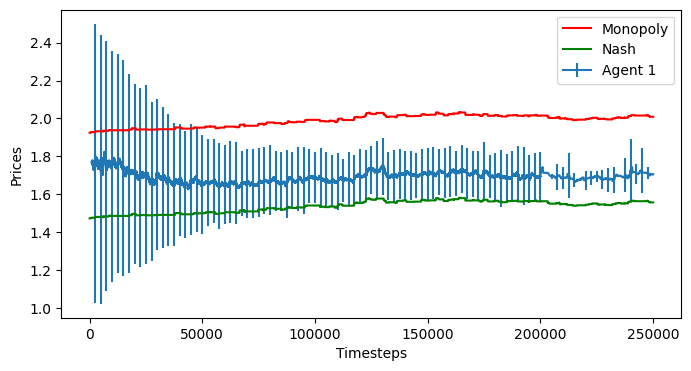

In [30]:
import matplotlib.pyplot as plt
from utils.get_plots import get_rolling, get_rolling_std
import pandas as pd

## EXPORT
results = pd.DataFrame({'costs': costs_history,
                        'pi_N': pi_N_history,
                        'pi_M': pi_M_history,
                        'delta': delta_history,
                        'p_nash': nash_history,
                        'p_monopoly': monopoly_history,
                        'A': A_history,
                        })

for agent in range(env.N):
    results[f'actions_{agent}'] = actions_history[:, agent]
    results[f'prices_{agent}'] = prices_history[:, agent]
    results[f'quantities_{agent}'] = quantities_history[:, agent]
    results[f'rewards_{agent}'] = rewards_history[:, agent]
    
results.to_csv(f'agent_{random_state}.csv', index = False, sep = ';', encoding = 'utf-8-sig')

window_size = 1000

prices_serie = get_rolling(prices_history[:, 0], window_size)
prices_serie_std = get_rolling_std(prices_history[:, 0], window_size)

series_size = len(prices_serie)

plt.figure(figsize = (8, 4))
plt.errorbar(range(series_size), prices_serie, prices_serie_std, errorevery=int(0.01 * series_size), label = f'Agent 1')
plt.plot(monopoly_history, color = 'red', label = 'Monopoly')
plt.plot(nash_history, color = 'green', label = 'Nash')
plt.xlabel('Timesteps')
plt.ylabel('Prices')
plt.legend()
plt.savefig(f'figures/simple_experiments/bertrand_dqn_agent-{random_state}.pdf')

In [ ]:
# ESPERAR A ENTRENAR AGENTES 3381 Y 3382
# CARGAR AGENTES EN AMBIENTE TRAIN TEST CON SEMILLA 500
# GRAFICAR

# LUEGO EXPORTAR RESULTADOS A LATEX
# GENERAR FIGURAS Y REALIZAR PRESENTACION --> DEBERIA AVANZAR EN ESTOO

In [ ]:
from utils.plot_metrics import get_rolling, get_rolling_std
import pandas as pd

## EXPORT
results = pd.DataFrame({'costs': costs_history,
                        'pi_N': pi_N_history,
                        'pi_M': pi_M_history,
                        'delta': delta_history,
                        'p_nash': nash_history,
                        'p_monopoly': monopoly_history,
                        'A': A_history,
                        })

for agent in range(env.N):
    results[f'actions_{agent}'] = actions_history[:, agent]
    results[f'prices_{agent}'] = prices_history[:, agent]
    results[f'quantities_{agent}'] = quantities_history[:, agent]
    results[f'rewards_{agent}'] = rewards_history[:, agent]
    
results.to_csv(f'test2.csv', index = False, sep = ';', encoding = 'utf-8-sig')

## READ AND PREPARE
window_size = 1000
df_avg = pd.DataFrame()
df_std = pd.DataFrame()

df_plot = pd.read_csv('test2.csv', sep = ';', encoding = 'utf-8-sig')

actions_cols = [col for col in df_plot.columns if 'actions' in col]
price_cols = [col for col in df_plot.columns if 'prices' in col]
rewards_cols = [col for col in df_plot.columns if 'rewards' in col]
quantities_cols = [col for col in df_plot.columns if 'quantities' in col]

n_agents = len(actions_cols)

df_plot['avg_actions'] = df_plot[actions_cols].mean(axis = 1)
df_plot['avg_prices'] = df_plot[price_cols].mean(axis = 1)
df_plot['avg_rewards'] = df_plot[rewards_cols].mean(axis = 1)
df_plot['avg_quantities'] = df_plot[quantities_cols].mean(axis = 1)
avg_cols = [col for col in df_plot.columns if 'avg' in col]

window_cols = price_cols + rewards_cols + quantities_cols + avg_cols + ['delta']
for col in window_cols:
    df_avg[col] = get_rolling(df_plot[col], window_size = window_size)
    df_std[col] = get_rolling_std(df_plot[col], window_size = window_size)

series_size = df_avg.shape[0]

df_plot.tail()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))
for agent in range(n_agents):
    serie = f'prices_{agent}'
    #plt.plot(price_serie, label = f'Agent {agent}')
    plt.errorbar(range(series_size), df_avg[serie], df_std[serie], errorevery=int(0.01 * series_size), label = f'Agent {agent}')
plt.plot(df_plot['p_monopoly'], color = 'red', label = 'Monopoly price')
plt.plot(df_plot['p_nash'], color = 'green', label = 'Nash price')
plt.xlabel('Timesteps')
plt.ylabel('Prices')
plt.title('Experiments Results Sample')
plt.legend()
plt.savefig('prices.png')

In [ ]:
window_size = 1000
std_avg = get_rolling(agents[0].mean_history, window_size)
std_std = get_rolling_std(agents[0].mean_history, window_size)

std_size = len(std_std)

plt.figure(figsize = (12, 4))
plt.errorbar(range(std_size), std_avg, std_std, errorevery=int(0.01 * std_size))
plt.xlabel('Timesteps')
plt.ylabel('Standard Deviation (std)')
plt.title('Standard Deviation of Agent 0')
#plt.savefig('desviacion_estandar.png')

In [ ]:
window_size = 1000
std_avg = get_rolling(agents[0].std_history, window_size)
std_std = get_rolling_std(agents[0].std_history, window_size)

std_size = len(std_std)

plt.figure(figsize = (12, 4))
plt.errorbar(range(std_size), std_avg, std_std, errorevery=int(0.01 * std_size))
plt.xlabel('Timesteps')
plt.ylabel('Standard Deviation (std)')
plt.title('Standard Deviation of Agent 0')
#plt.savefig('desviacion_estandar.png')

In [ ]:
import matplotlib.pyplot as plt

size = len(df_avg[serie])
plt.figure(figsize = (12, 4))
#plt.plot(df_plot['avg_prices'], label = 'Average prices')
plt.errorbar(range(series_size), df_avg['avg_prices'], df_std['avg_prices'], errorevery=int(0.01 * series_size), label = f'Average prices')
plt.plot(df_plot['p_monopoly'], color = 'red', label = 'Monopoly price')
plt.plot(df_plot['p_nash'], color = 'green', label = 'Nash price')
plt.xlabel('Timesteps')
plt.ylabel('Prices')
plt.legend()
plt.savefig('plot.png')

In [ ]:
plt.figure(figsize = (12, 4))
#plt.plot(df_plot['avg_rewards'], label = 'Average profits')
plt.errorbar(range(series_size), df_avg['avg_rewards'], df_std['avg_rewards'], errorevery=int(0.01 * series_size), label = f'Average profits')
plt.plot(df_plot['pi_N'], label = 'Nash profits', color = 'green')
plt.plot(df_plot['pi_M'], label = 'Monopoly profits', color = 'red')
plt.xlabel('Timesteps')
plt.ylabel('Profits')
plt.legend()

In [ ]:
plt.figure(figsize = (12, 4))
#plt.plot(df_plot['delta'], label = 'Average profits')
plt.errorbar(range(series_size), df_avg['delta'], df_std['delta'], errorevery=int(0.01 * series_size), label = f'Average profits')
plt.axhline(1, color = 'red', label = 'Nash profits')
plt.axhline(0, color = 'green', label = 'Monoply profits')
plt.xlabel('Timesteps')
plt.ylabel('Delta')
plt.legend()

In [ ]:
import pandas as pd
import numpy as np

sample_size = 10

df  = pd.read_csv('test2.csv', sep = ';')
df = df.iloc[8000:8000 + sample_size]
df['rewards_0'] = df['rewards_0'].replace(0, np.nan)
df['rewards_1'] = df['rewards_1'].replace(0, np.nan)

df = df.dropna()
df

In [ ]:
import matplotlib.pyplot as plt
# Crea un histograma para la columna
plt.hist(df['prices_0'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')
plt.grid(True)

In [ ]:
import matplotlib.pyplot as plt
# Crea un histograma para la columna
plt.hist(df['rewards_0'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de Recompensas')
plt.grid(True)